<a href="https://colab.research.google.com/github/thehapyone/Thesis_Project/blob/master/data_evaluation_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing v3 -- Change History For Feature Engineering Missing Data File
### v2
 The following features missing parameters have been cleaned and updated - 
 **'LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG**' were cleaned and updated in the v2_feature_engineering_data.csv file.

### v3

**LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL and LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL** were cleaned and updated in the v3_feature_engineering_data.csv file

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_feature_engineering_data.csv", sep=',', low_memory=False)
#data_comb = pd.read_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_Sorted_Database.csv", sep=',', low_memory=False)


## Analyzing Missing Values


In [8]:
# check columns with missing values
pd.set_option('display.max_rows', 500)
# in percentage
#100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0])
data.isnull().sum().sort_values(ascending=False)

LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER          1583
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          988
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            988
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          987
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           941
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           941
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     941
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           897
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           897
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           897
X_PSC_P1JAZ_RATED_ENGINE_POWER                       897
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           897
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           897
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          897
X_PSC_P1JR0_AUTOMATIC_CRYSTALS_REGENERATIO           896
X_PSC_P1IT2_AFTERTREATMENT_REGENERATION_IN           896
LX_PSC_P1IT1_AFTERTREATMENT_REGENERATION_IN          896
LX_PSC_P1IT0_AFTERTREATMENT_REG

In [0]:
# using interativeimputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
# this feature ['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'] has a good relationship with -
# - LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D, LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING
# data['LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG'].isnull().value_counts()

In [0]:
data_reg_1 = data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']]


In [12]:
data_reg_1.isnull().sum().sort_values(ascending=False)

LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG    0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        0
dtype: int64

In [0]:
imp = IterativeImputer(max_iter=10, random_state=42)


In [0]:
# perform imputation ont the missing values
result = pd.DataFrame(imp.fit_transform(data_reg_1.values), columns=data_reg_1.columns)

In [15]:
result.isnull().sum().sort_values(ascending=False)

LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG    0
LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING        0
LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D        0
dtype: int64

In [0]:
# updates the dataframe
data[['LX_PSC_P1FUO_NUMBER_OF_STARTER_ACTIVATION_D', 'LX_PSC_P1FUN_NUMBER_OF_ENGINE_STARTS_DURING', 'LX_PST_P1B3A_332_BCLVEHICLEMODECRANKINGTIME_LOG']] = result

In [0]:
# updated the current database with this new changes
# save new data frame
# data.to_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v2_feature_engineering_data.csv", sep=',', index=False)


In [17]:
#100 * (data.isnull().sum().sort_values(ascending=False) / data.shape[0])
data.isnull().sum().sort_values(ascending=False)

LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER          1583
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          988
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            988
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          987
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           941
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           941
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     941
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           897
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           897
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           897
X_PSC_P1JAZ_RATED_ENGINE_POWER                       897
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           897
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           897
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          897
X_PSC_P1JR0_AUTOMATIC_CRYSTALS_REGENERATIO           896
X_PSC_P1IT2_AFTERTREATMENT_REGENERATION_IN           896
LX_PSC_P1IT1_AFTERTREATMENT_REGENERATION_IN          896
LX_PSC_P1IT0_AFTERTREATMENT_REG

In [18]:
data.isnull().sum(axis=1)[data.isnull().sum(axis=1) > 0].shape[0]

4092

In [19]:
############ 
# Analzing this features
'''
LX_PMU_P1FH1_SLOPE_X_INDEX_5                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_30                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_31                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_4                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_9                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_6                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_7                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_8                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_28                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_29                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_3                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_27                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_18                        792
X_PMU_P1FH1_SLOPE_X_INDEX_32                         792
X_PMU_P1FH1_SLOPE_X_INDEX_1                          792
LX_PMU_P1FH1_SLOPE_X_INDEX_10                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_11                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_12                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_26                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_14                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_15                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_16                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_17                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_13                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_2                         792
LX_PMU_P1FH1_SLOPE_X_INDEX_20                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_21                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_22                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_23                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_24                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_19                        792
LX_PMU_P1FH1_SLOPE_X_INDEX_25                        792
'''

'\nLX_PMU_P1FH1_SLOPE_X_INDEX_5                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_30                        792\nLX_PMU_P1FH1_SLOPE_X_INDEX_31                        792\nLX_PMU_P1FH1_SLOPE_X_INDEX_4                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_9                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_6                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_7                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_8                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_28                        792\nLX_PMU_P1FH1_SLOPE_X_INDEX_29                        792\nLX_PMU_P1FH1_SLOPE_X_INDEX_3                         792\nLX_PMU_P1FH1_SLOPE_X_INDEX_27                        792\nLX_PMU_P1FH1_SLOPE_X_INDEX_18                        792\nX_PMU_P1FH1_SLOPE_X_INDEX_32                         792\nX_PMU_P1FH1_SLOPE_X_INDEX_1                          792\nLX_PMU_P1FH1_SLOPE_X_INDEX_10                        792\nLX_PMU_P1FH1_SLOPE_X_INDEX_11                        792\nLX_PMU_P1FH

In [20]:
data.corr()['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL'].sort_values(ascending=False)[:20]

LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL                  1.000000
LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL             0.991111
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION               0.986170
LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY                0.984915
LX_PSC_P1BBZ_TOTAL_ENGINE_REVOLUTIONS             0.972804
LX_PSC_P1IPX_TOTAL_INJECTED_UREA__L               0.964001
LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME             0.961468
LX_PST_P1B3R_60_ELFUELCONSUMPTIONVEHICLERUNNIN    0.960346
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_11     0.954588
LX_PSC_P1AST_MAIN_LOG_DRIVE_DISTANCE              0.951978
LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME                  0.950810
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_10     0.950553
LX_PSC_P1AS4_MAIN_LOG_ECON_DISTANCE               0.946402
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_9      0.945302
LX_PSC_P1BB0_TOTAL_ENGINE_TIME                    0.945157
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_12     0.944903
LX_TOTAL_VEHICLE_DISTANCE_RULE_BASED              0.9415

In [21]:
data['LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER'].describe()

count     18371.000000
mean     168062.936369
std      114455.285430
min           0.000000
25%       80869.335329
50%      152352.147059
75%      239138.422606
max      825688.786517
Name: LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER, dtype: float64

In [0]:
# analyzing LX_PMU_P1FH1_SLOPE_X_INDEX_5

In [23]:
data['LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT'].describe()

count     18966.000000
mean     117182.619757
std       78318.406665
min           0.000000
25%       59051.656007
50%      104580.046729
75%      160621.548077
max      666247.404494
Name: LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT, dtype: float64

In [24]:
data['LX_PMU_P1FH1_SLOPE_X_INDEX_4'].describe()

count    1.916200e+04
mean     1.145499e+04
std      5.461554e+04
min      0.000000e+00
25%      4.310000e+02
50%      1.738335e+03
75%      6.123958e+03
max      2.167276e+06
Name: LX_PMU_P1FH1_SLOPE_X_INDEX_4, dtype: float64

In [0]:
temp = data[data['T_CHASSIS'] == 'O-695072']

In [26]:
temp.corr()['LX_PMU_P1FH1_SLOPE_X_INDEX_2'].sort_values(ascending=False)[:20]

DAY                             NaN
MONTH                           NaN
YEAR                            NaN
Malfunction_Label               NaN
RUL                             NaN
INT_BWSD                        NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_10   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_11   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_12   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_13   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_14   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_15   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_16   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_17   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_18   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_19   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_2    NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_20   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_21   NaN
LX_PMU_P1FH1_SLOPE_X_INDEX_22   NaN
Name: LX_PMU_P1FH1_SLOPE_X_INDEX_2, dtype: float64

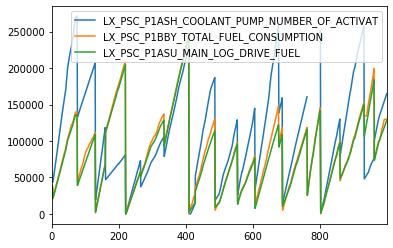

In [27]:
data[['LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', ]][:1000].plot()


### Updating LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL and LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL

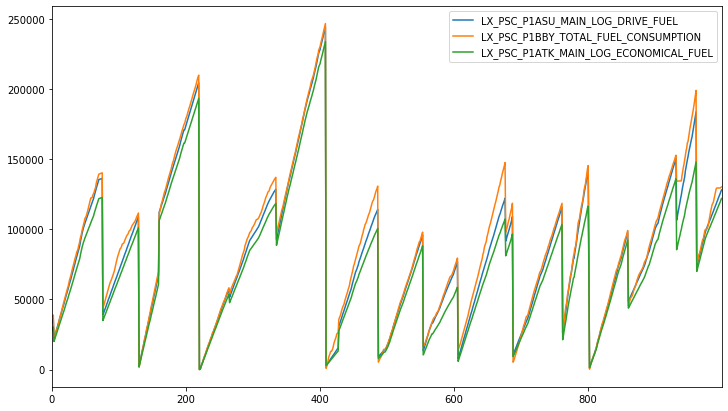

In [28]:
data[['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL']][:1000].plot(figsize=(12,7))

In [0]:
from copy import copy

In [0]:
# imputer
data_index = data[['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY', 'LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL']]

In [31]:
data.shape

(19954, 438)

In [0]:
train = data_index.dropna()

In [33]:
train.shape

(19691, 4)

In [0]:
X_train, X_test = train[:15000], train[-1000:]

In [0]:
X_test2 = copy(X_test)
X_test2['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL'] = np.nan

In [36]:
data_index.isnull().sum()

LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL         263
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION        0
LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY         0
LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL    263
dtype: int64

In [0]:
imp = IterativeImputer(max_iter=10, random_state=42)

In [0]:
# find the missing values for this two features: LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL and LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL
results = pd.DataFrame(imp.fit_transform(data_index.values), columns=data_index.columns)

In [0]:
# update the main dataframe with this two new features:
data.update(results)

In [0]:
pred = imp.transform(X_test2.values)

In [49]:
data[['LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL', 'LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION', 'LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY', 'LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL']].isnull().sum()

LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL         0
LX_PSC_P1BBY_TOTAL_FUEL_CONSUMPTION      0
LX_PSC_P1ATO_MAIN_LOG_TOTAL_ENERGY       0
LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL    0
dtype: int64

In [0]:
# save the new changes as v3 -
# updated the current database with this new changes
# save new data frame
# data.to_csv("drive/My Drive/Thesis/data/Data_Engineering/Edited_Raw_Data/v3_feature_engineering_data.csv", sep=',', index=False)


In [41]:
##############
##########3
##########
data.isnull().sum(axis=1)[data.isnull().sum(axis=1) > 0].shape[0]

4092

In [42]:
data.isnull().sum().sort_values(ascending=False)

LX_PSC_P1MNF_COMPRESSOR_LOAD_PHASE_COUNTER          1583
LX_PSC_P1ASH_COOLANT_PUMP_NUMBER_OF_ACTIVAT          988
LX_PSC_P1ASI_COOLANT_PUMP_ACTIVATION_TIME            988
LX_PSC_P1I80_TOP_VALUE_OF_ENGINE_SPEED_IN_O          987
X_PSC_P1ATV_OIL_LIFE_AT_PAST_DUE                     941
X_PSC_P1ATR_OIL_DEGRADATION_LAST_OLC_DISTA           941
X_PSC_P1ATS_OIL_DEGRADATION_LAST_OLC_HOURS           941
SX_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS          897
X_PSC_P1LJQ_ADBLUE_ADAPTION_FACTOR_INITIAL           897
X_PSC_P1IOY_SOOT_MASS_REPORTED_BY_KALMAN_F           897
X_PSC_P1IT7_NUMBER_OF_TIMES_THE_ESTIMATED_           897
X_PSC_P1JBT_SCR_OPERATOR_INDUCEMENT_REASON           897
X_PSC_P1ITY_NUMBER_OF_PARKED_REGENERATIONS           897
X_PSC_P1JAZ_RATED_ENGINE_POWER                       897
LX_PSC_P1IT1_AFTERTREATMENT_REGENERATION_IN          896
LX_PSC_P1IT0_AFTERTREATMENT_REGENERATION_IN          896
X_PSC_P1K8T_NUMBER_OF_SUCCESSIVE_INTERRUPT           896
X_PSC_P1JR0_AUTOMATIC_CRYSTALS_

### Updating LOG Distance data
LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE                 263
LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE              263
LX_PSC_P1AS4_MAIN_LOG_ECON_DISTANCE                  263
LX_PSC_P1AS5_MAIN_LOG_PEDAL_DISTANCE                 263
LX_PSC_P1AS6_MAIN_LOG_PTO_DISTANCE                   263
LX_PSC_P1AS7_MAIN_LOG_ROAD_SPEED_LIMIT_DIST          263
LX_PSC_P1ASP_MAIN_LOG_CRUISE_DISTANCE                263
LX_PSC_P1ASQ_MAIN_LOG_CRUISE_FUEL                    263
LX_PSC_P1ASR_MAIN_LOG_CRUISE_TIME                    263
LX_PSC_P1ASW_MAIN_LOG_IDLE_FUEL                      263
LX_PSC_P1ASX_MAIN_LOG_PTO_FUEL                       263
LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME                  263
LX_PSC_P1ATB_MAIN_LOG_CUSTOMER_ENGINE_SPEED          263

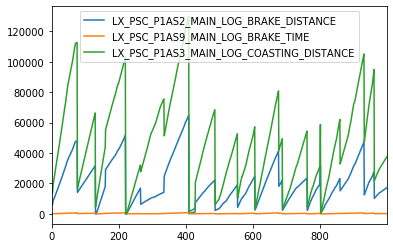

In [43]:
data[['LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE', 'LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME', 'LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE']][:1000].plot()

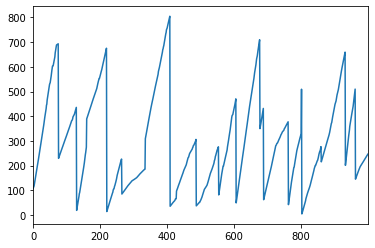

In [44]:
data['LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME'][:1000].plot()

In [45]:
data.corr()['LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE'].sort_values(ascending=False)[:20]

LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE              1.000000
LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME                  0.971596
LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE           0.921914
LX_PMU_P1FH1_SLOPE_X_INDEX_14                     0.908355
LX_PMU_P1FH1_SLOPE_X_INDEX_19                     0.907425
LX_PMU_P1FH1_SLOPE_X_INDEX_20                     0.902729
LX_PMU_P1FH1_SLOPE_X_INDEX_13                     0.892194
LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME               0.883916
LX_PSC_P1IPX_TOTAL_INJECTED_UREA__L               0.875505
LX_PMU_P1FH1_SLOPE_X_INDEX_15                     0.871813
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_12     0.871668
LX_PMU_P1FH1_SLOPE_X_INDEX_18                     0.869868
LX_PSC_P1ATK_MAIN_LOG_ECONOMICAL_FUEL             0.864227
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_11     0.861669
LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL                  0.859392
LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME             0.848989
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_10     0.8435

So there is a clear relationship between LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME and LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE. 

So there is a clear relationship between LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME and LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE. 

In [46]:
data.corr()['LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE'].sort_values(ascending=False)[:20]

LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE            1.000000
LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME                0.981716
LX_PMU_P1FH1_SLOPE_X_INDEX_19                      0.929612
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_12      0.928890
LX_PMU_P1FH1_SLOPE_X_INDEX_14                      0.926032
LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE               0.921914
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_11      0.921368
LX_PST_P1C2O_363_VDLCOMPRCONJUNCTIONNOTTRACTION    0.916823
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_13      0.914897
LX_PMU_P1FH1_SLOPE_X_INDEX_18                      0.913245
LX_PSC_P1BBZ_TOTAL_ENGINE_REVOLUTIONS              0.912829
LX_PSC_P1IPX_TOTAL_INJECTED_UREA__L                0.911253
LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME                   0.910763
LX_PMU_P1FH1_SLOPE_X_INDEX_15                      0.910554
LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME              0.910370
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_1       0.909544
LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL        

In [47]:
data[['LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME', 'LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE', 'LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE', 'LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME', 'LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME', 'LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME']].isnull().sum()

LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME             0
LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE       263
LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE    263
LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME        263
LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME             0
LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME      263
dtype: int64

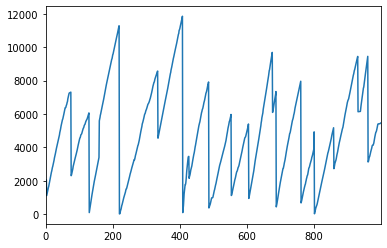

In [48]:
data['LX_PSC_P1BB0_TOTAL_ENGINE_TIME'][:1000].plot()

## Observation
One major observation from attempting to analyze noise from the data is that a couple of the features have high correlation with each others which makes them redundant in nature. 

We can evaluate the impact of droping some of the redundant features and see if it helps or worse the model predictive mainteance. 

Fro example: this feature: LX_PSC_P1AS3_MAIN_LOG_COASTING_DISTANCE have a 90% corelation with the following features:
LX_PSC_P1ATA_MAIN_LOG_COASTING_TIME                0.981716
LX_PMU_P1FH1_SLOPE_X_INDEX_19                      0.929612
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_12      0.928890
LX_PMU_P1FH1_SLOPE_X_INDEX_14                      0.926032
LX_PSC_P1AS2_MAIN_LOG_BRAKE_DISTANCE               0.921914
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_11      0.921368
LX_PST_P1C2O_363_VDLCOMPRCONJUNCTIONNOTTRACTION    0.916823
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_13      0.914897
LX_PMU_P1FH1_SLOPE_X_INDEX_18                      0.913245
LX_PSC_P1BBZ_TOTAL_ENGINE_REVOLUTIONS              0.912829
LX_PSC_P1IPX_TOTAL_INJECTED_UREA__L                0.911253
LX_PSC_P1ASV_MAIN_LOG_DRIVE_TIME                   0.910763
LX_PMU_P1FH1_SLOPE_X_INDEX_15                      0.910554
LX_PSC_P1ATD_MAIN_LOG_ECONOMICAL_TIME              0.910370
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_1       0.909544
LX_PSC_P1ASU_MAIN_LOG_DRIVE_FUEL                   0.909343
LX_PMU_P1FWM_ENGINE_SPEED_TORQUE_H_Y_INDEX_10      0.907613
LX_PMU_P1FH1_SLOPE_X_INDEX_20                      0.904260
LX_PSC_P1AS9_MAIN_LOG_BRAKE_TIME                   0.903209

and even doing a plot of those features shows some level of similar measurement.